In [2]:
import numpy as np
traindata = np.loadtxt('./traindata.txt')
X = traindata[:, :-1]
Y = traindata[:, -1]
Xtest = np.loadtxt('./testinputs.txt')


In [3]:
import numpy as np
def basisLS(Z, y):
    assert len(Z.shape) == 2 # z = d x n
    assert Z.shape[1] == y.shape[0] # y = n x 1
    # W = np.linalg.pinv(Z@Z.T==) @ Z @ y
    W = np.linalg.solve(Z@Z.T, Z@y) # W = d x 1

    R = np.sum((Z.T@W-y)**2) # W = d x 1
    return W, R


In [4]:
from itertools import combinations_with_replacement
def poly_expand(x, p):
    #  x = n x d
    # p = order of polynomial
    n, d = x.shape
    features = [np.ones((n, 1))]
    for degree in range(1, p+1):
        for combination in combinations_with_replacement(range(d), degree):
            feat = np.prod(x[:, combination], axis=1).reshape(-1, 1)
            features.append(feat)
    return np.hstack(features)

In [5]:
def kfold_cv(x, y, p, K):
    # p = polynomial order
    # K = number of folds

    Z  = poly_expand(x, p).T # Z = d x n

    # make Z = d x n x p
    print(x.shape, y.shape)
    print(Z.shape)
    # print(Z.shape)
    # print(y.shape)
    N = y.shape[0]
    test_Rs = []
    train_Rs = []
    
    for fold in range(K):
        start = int(fold / K * N)
        end   = int((fold + 1) / K * N)

        # boolean mask
        mask = np.ones(N, dtype=bool)
        mask[start:end] = False   # test indices set to False

        # split
        train_x, train_y = Z[:, mask], y[mask, :]
        test_x,  test_y  = Z[:, ~mask], y[~mask, :]

        # fit on train
        W, _ = basisLS(train_x, train_y)

        # compute residuals
        train_R = np.sum((train_x.T @ W - train_y) ** 2)
        test_R  = np.sum((test_x.T @ W - test_y) ** 2)
        test_Rs.append(test_R)
        train_Rs.append(train_R)
        
    return np.sum(train_Rs)/len(train_Rs), np.sum(test_Rs)/len(test_Rs)
    
    
    

In [6]:
print(X.shape, Y.shape)

(926, 8) (926,)


In [9]:
test_cvs = []
train_cvs = []
order_range = 9
for order in range(1, order_range):
    train_cv, test_cv = kfold_cv(X, Y.reshape(-1, 1), p=order, K=2)
    train_cvs.append(train_cv)
    test_cvs.append(test_cv)


(926, 8) (926, 1)
(9, 926)
(926, 8) (926, 1)
(45, 926)
(926, 8) (926, 1)
(165, 926)
(926, 8) (926, 1)
(495, 926)
(926, 8) (926, 1)
(1287, 926)
(926, 8) (926, 1)
(3003, 926)
(926, 8) (926, 1)
(6435, 926)
(926, 8) (926, 1)
(12870, 926)


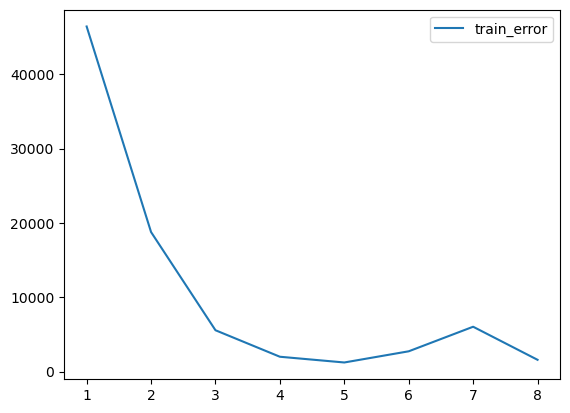

[46451.21167509777, 18775.38358265922, 5554.742135348122, 1986.6119703505224, 1214.9365933267422, 2720.087735986584, 6026.63574614275, 1574.3792782235569]


In [10]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1, order_range)], train_cvs, label="train_error")
# plt.plot([i for i in range(1, order_range)], test_cvs, label="test_error")
plt.legend()
plt.show()

print(train_cvs)